In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

print("✅ All imports successful!")


✅ All imports successful!


In [20]:
# All 5 dataset paths (cleaned structure)
PATHS = {
    "plantvillage" : Path("../datasets/plantvillage/color"),
    "plantdoc"     : Path("../datasets/plantdoc/train"),
    "indian_crops" : Path("../datasets/indian_crops/Final_Dataset"),
    "rice_leaf"    : Path("../datasets/rice_leaf/train"),
    "rice_mendeley": Path("../datasets/rice_mendeley"),
}

print("Dataset Paths — Existence Check:")
print("-" * 45)
for name, path in PATHS.items():
    status = "✅ Found" if path.exists() else "❌ NOT FOUND"
    print(f"  {name:<20} → {status}")


Dataset Paths — Existence Check:
---------------------------------------------
  plantvillage         → ✅ Found
  plantdoc             → ✅ Found
  indian_crops         → ✅ Found
  rice_leaf            → ✅ Found
  rice_mendeley        → ✅ Found


In [21]:
def count_dataset(path):
    classes = [f for f in path.iterdir() if f.is_dir()]
    data = {}
    for cls in sorted(classes):
        images = [
            f for f in cls.iterdir()
            if f.suffix.lower() in ['.jpg', '.jpeg', '.png']
        ]
        data[cls.name] = len(images)
    return data

print("=" * 60)
print("DATASET-WISE BREAKDOWN")
print("=" * 60)

summary = {}
for name, path in PATHS.items():
    data = count_dataset(path)
    total = sum(data.values())
    summary[name] = {"classes": len(data), "images": total}
    print(f"\n📁 {name.upper()}")
    print(f"   Classes : {len(data)}")
    print(f"   Images  : {total:,}")
    print(f"   Folders : {list(data.keys())[:3]}...")


DATASET-WISE BREAKDOWN

📁 PLANTVILLAGE
   Classes : 38
   Images  : 54,305
   Folders : ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust']...

📁 PLANTDOC
   Classes : 27
   Images  : 2,668
   Folders : ['Apple_leaf', 'Apple_rust_leaf', 'Apple_Scab_Leaf']...

📁 INDIAN_CROPS
   Classes : 26
   Images  : 1,278
   Folders : ['Corn___Common_Rust', 'Corn___Gray_Leaf_Spot', 'Corn___Healthy']...

📁 RICE_LEAF
   Classes : 6
   Images  : 2,700
   Folders : ['bacterial_leaf_blight', 'brown_spot', 'healthy']...

📁 RICE_MENDELEY
   Classes : 4
   Images  : 10,766
   Folders : ['Bacterial_Leaf_Blight', 'Rice_Blast', 'Rice_Healthy']...


In [22]:
print("\n" + "=" * 55)
print(f"{'Dataset':<20} {'Classes':>8} {'Images':>10}")
print("-" * 55)

grand_classes = 0
grand_images  = 0

for name, val in summary.items():
    print(f"  {name:<18} {val['classes']:>8} {val['images']:>10,}")
    grand_classes += val['classes']
    grand_images  += val['images']

print("-" * 55)
print(f"  {'TOTAL':<18} {grand_classes:>8} {grand_images:>10,}")
print("=" * 55)



Dataset               Classes     Images
-------------------------------------------------------
  plantvillage             38     54,305
  plantdoc                 27      2,668
  indian_crops             26      1,278
  rice_leaf                 6      2,700
  rice_mendeley             4     10,766
-------------------------------------------------------
  TOTAL                   101     71,717


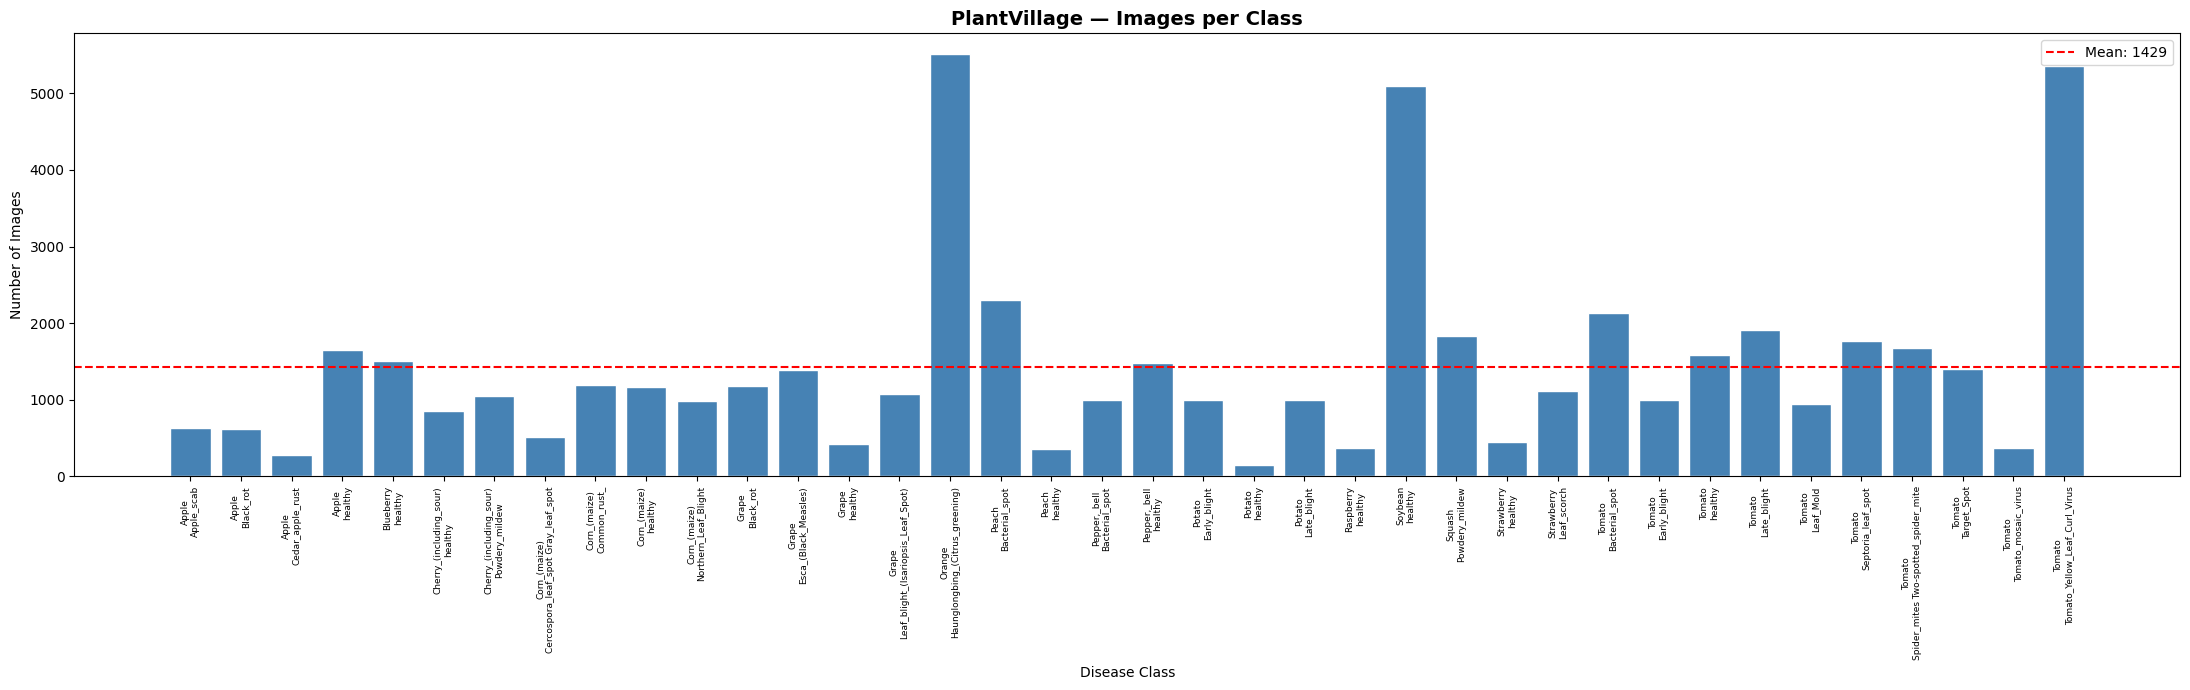

Min: 152 | Max: 5507 | Mean: 1429


In [23]:
pv_data = count_dataset(PATHS["plantvillage"])

names  = [k.replace("___", "\n") for k in pv_data.keys()]
counts = list(pv_data.values())

plt.figure(figsize=(22, 7))
bars = plt.bar(range(len(names)), counts, color='steelblue', edgecolor='white')
plt.xticks(range(len(names)), names, rotation=90, fontsize=6.5)
plt.title("PlantVillage — Images per Class", fontsize=14, fontweight='bold')
plt.xlabel("Disease Class")
plt.ylabel("Number of Images")
plt.axhline(y=np.mean(counts), color='red', linestyle='--', label=f'Mean: {int(np.mean(counts))}')
plt.legend()
plt.tight_layout()
plt.savefig("class_distribution_plantvillage.png", dpi=150)
plt.show()
print(f"Min: {min(counts)} | Max: {max(counts)} | Mean: {int(np.mean(counts))}")


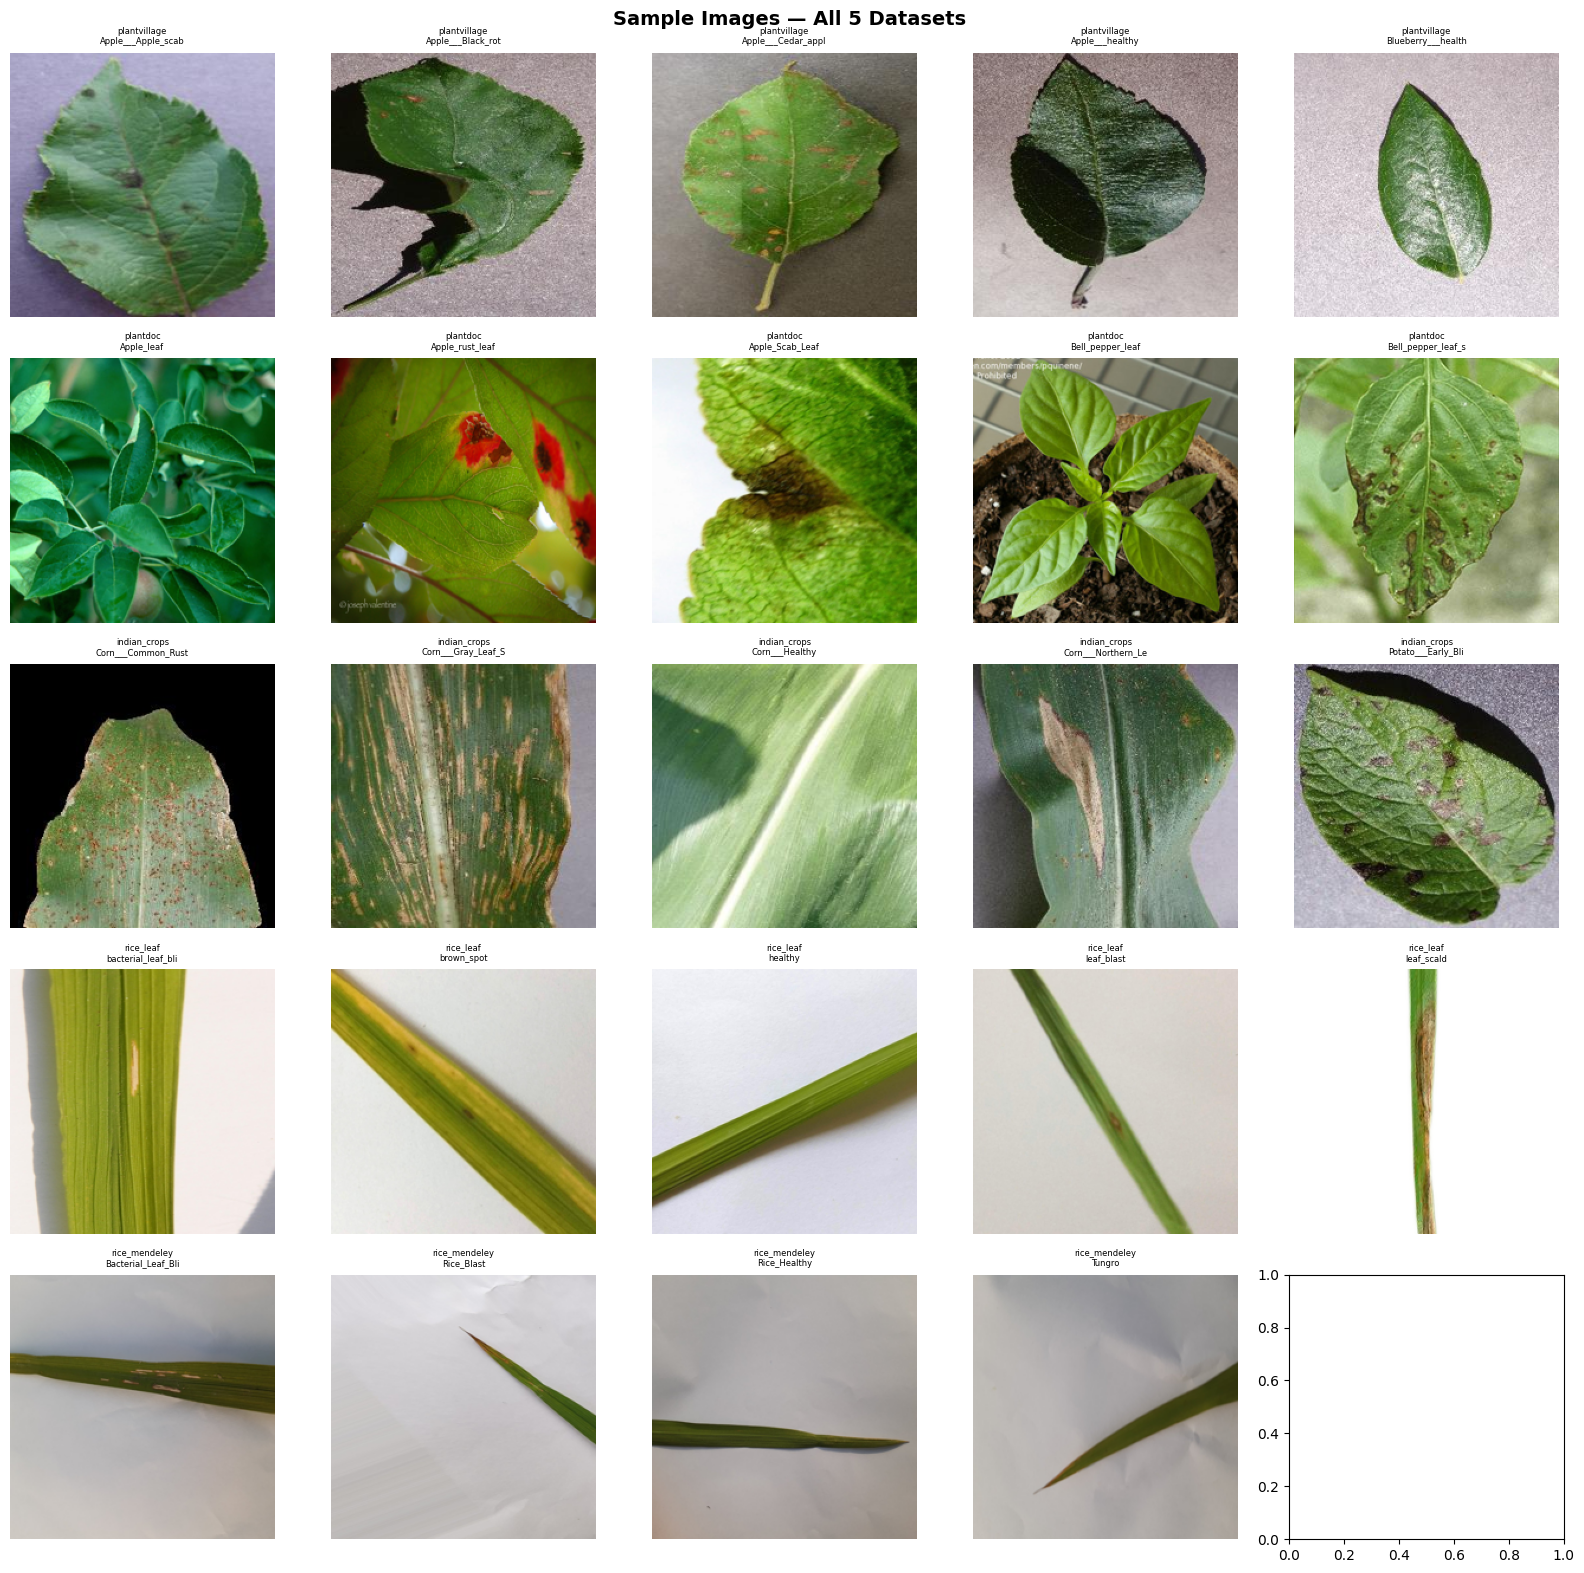

✅ Sample grid saved!


In [24]:
fig, axes = plt.subplots(5, 5, figsize=(16, 16))

for row, (name, path) in enumerate(PATHS.items()):
    classes = [f for f in path.iterdir() if f.is_dir()]
    selected = classes[:5]  # pehli 5 classes

    for col, cls in enumerate(selected):
        imgs = [
            f for f in cls.iterdir()
            if f.suffix.lower() in ['.jpg', '.jpeg', '.png']
        ]
        if imgs:
            img = Image.open(imgs[0]).resize((224, 224))
            axes[row][col].imshow(img)
            axes[row][col].set_title(
                f"{name}\n{cls.name[:18]}", fontsize=6
            )
        axes[row][col].axis('off')

plt.suptitle("Sample Images — All 5 Datasets", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig("sample_images_all_datasets.png", dpi=150)
plt.show()
print("✅ Sample grid saved!")



In [25]:
print("IMAGE SIZE ANALYSIS (sample 10 images per dataset)")
print("=" * 55)

for name, path in PATHS.items():
    classes  = [f for f in path.iterdir() if f.is_dir()]
    sizes    = []

    for cls in classes[:3]:   # pehli 3 classes se sample lo
        imgs = [
            f for f in cls.iterdir()
            if f.suffix.lower() in ['.jpg','.jpeg','.png']
        ]
        for img_file in imgs[:3]:
            img = Image.open(img_file)
            sizes.append(img.size)

    unique_sizes = set(sizes)
    print(f"\n  📁 {name}")
    print(f"     Sizes found : {unique_sizes}")
    print(f"     Uniform     : {'✅ Yes' if len(unique_sizes)==1 else '⚠️ Mixed sizes'}")

print("\n" + "=" * 55)
print("  ✅ All images will be resized to (224, 224)")
print("     during preprocessing — EfficientNet standard")
print("=" * 55)


IMAGE SIZE ANALYSIS (sample 10 images per dataset)

  📁 plantvillage
     Sizes found : {(256, 256)}
     Uniform     : ✅ Yes

  📁 plantdoc
     Sizes found : {(900, 692), (440, 470), (800, 720), (1000, 788), (2592, 1944), (565, 943), (400, 599), (525, 525), (602, 602)}
     Uniform     : ⚠️ Mixed sizes

  📁 indian_crops
     Sizes found : {(256, 256)}
     Uniform     : ✅ Yes

  📁 rice_leaf
     Sizes found : {(1600, 1600)}
     Uniform     : ✅ Yes

  📁 rice_mendeley
     Sizes found : {(1440, 1080), (810, 1080)}
     Uniform     : ⚠️ Mixed sizes

  ✅ All images will be resized to (224, 224)
     during preprocessing — EfficientNet standard


In [26]:
print("\n" + "🌾 " * 20)
print("\n  KRISHISAT-AI — DATA EXPLORATION COMPLETE\n")
print("🌾 " * 20)
print(f"""
  Total Images   : {grand_images:,}
  Total Classes  : {grand_classes}
  
  ✅ Real field photos   : plantdoc (robust training)
  ✅ India specific      : indian_crops + rice datasets
  ✅ Large base dataset  : plantvillage (54K images)
  ✅ rice_mendeley       : cleaned (merged healthy classes)
  
  ⚠️  Known Issues (handled in Day 3):
  → Class imbalance      : weighted loss will fix
  → indian_crops low img : heavy augmentation will fix
  → Mixed image sizes    : resize to 224x224 will fix
  
  Next → 02_data_preprocessing.ipynb (Day 3)
""")



🌾 🌾 🌾 🌾 🌾 🌾 🌾 🌾 🌾 🌾 🌾 🌾 🌾 🌾 🌾 🌾 🌾 🌾 🌾 🌾 

  KRISHISAT-AI — DATA EXPLORATION COMPLETE

🌾 🌾 🌾 🌾 🌾 🌾 🌾 🌾 🌾 🌾 🌾 🌾 🌾 🌾 🌾 🌾 🌾 🌾 🌾 🌾 

  Total Images   : 71,717
  Total Classes  : 101
  
  ✅ Real field photos   : plantdoc (robust training)
  ✅ India specific      : indian_crops + rice datasets
  ✅ Large base dataset  : plantvillage (54K images)
  ✅ rice_mendeley       : cleaned (merged healthy classes)
  
  ⚠️  Known Issues (handled in Day 3):
  → Class imbalance      : weighted loss will fix
  → indian_crops low img : heavy augmentation will fix
  → Mixed image sizes    : resize to 224x224 will fix
  
  Next → 02_data_preprocessing.ipynb (Day 3)

